### This notebook is intended to plot hysteresis patterns for the SPRING of 2023 (similar formar as summer storm plotting code)

Import all data -  Constituents, water surface elevation (WSE) and sonde turbidity and fDOM to plot hysteresis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LinearRegression

# directory where the CSV files are stored
directory = 'C:/Users/huck4481/Documents/GitHub/La_Jara/Hysteresis/Spring_2023'

# water depth data
depths = pd.read_csv(directory + '/2023_water_depths.csv', parse_dates=['Date_Time'], index_col='Date_Time')
# sonde data
down_sonde = pd.read_csv(directory + '/SP23_down_sonde.csv', parse_dates=['Date_Time'], index_col='Date_Time')
up_sonde = pd.read_csv(directory + '/SP23_up_sonde.csv', parse_dates=['Date_Time'], index_col='Date_Time')
# nutrient data
down_constituents = pd.read_csv(directory + '/SP23_down_constituents.csv', parse_dates=['Date_Time'], index_col='Date_Time')
up_constituents = pd.read_csv(directory + '/SP23_up_constituents.csv', parse_dates=['Date_Time'], index_col='Date_Time')

In [2]:
down_constituents

,WSE,Q,SS (uL/L),SRP (mg/L),TP (mg/L),DOC (mg/L),POC (mg/L),N (mg/L),PP (mg/L),LAB ID
Date_Time,,,,,,,,,,
2023-04-15 12:30:00,NaN,NaN,NaN,NaN,NaN,3.729,NaN,NaN,NaN,195
2023-04-15 16:30:00,NaN,NaN,NaN,NaN,NaN,3.573,NaN,NaN,NaN,196
2023-04-15 20:30:00,NaN,NaN,NaN,NaN,NaN,3.241,NaN,NaN,NaN,197
2023-04-16 00:30:00,NaN,NaN,NaN,NaN,NaN,3.202,NaN,NaN,NaN,198
2023-04-16 12:30:00,NaN,NaN,NaN,NaN,NaN,3.234,NaN,NaN,NaN,199
...,...,...,...,...,...,...,...,...,...,...
2023-05-04 11:00:00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,-
2023-05-04 02:00:00,NaN,NaN,0.00,NaN,NaN,2.933,NaN,NaN,NaN,353
2023-05-04 17:00:00,NaN,NaN,0.00,NaN,NaN,3.182,NaN,NaN,NaN,354


Plotting the raw turbidity and depth data

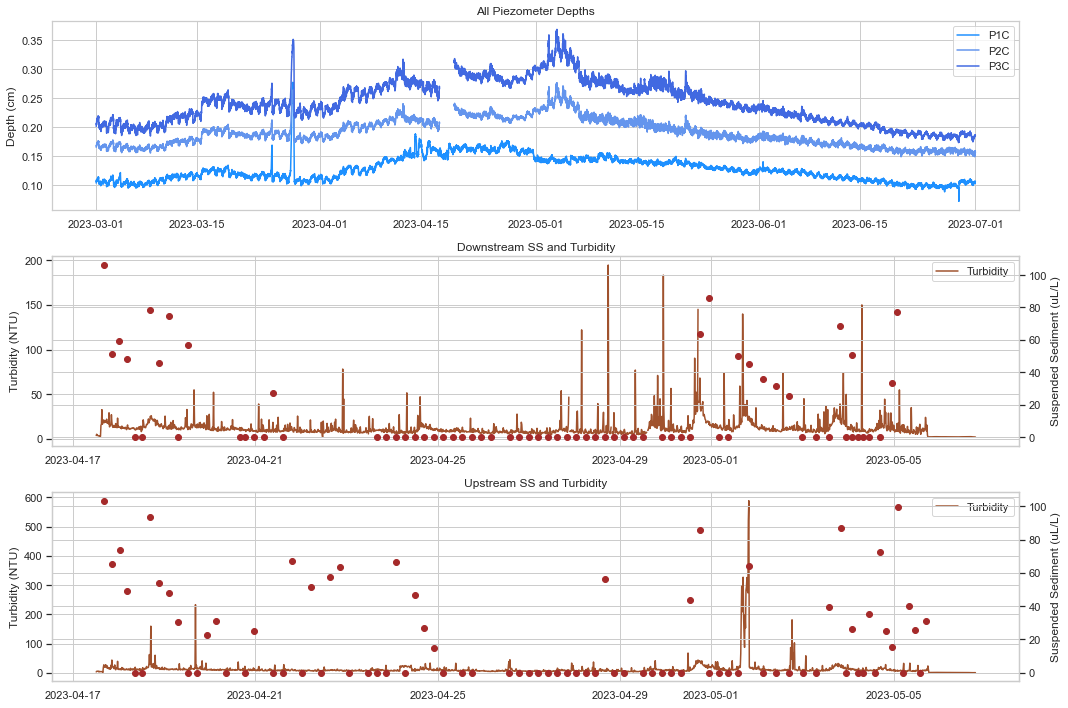

In [5]:
# filter for spring months
depths = depths.loc[depths.index.month.isin([3,4,5,6])]
down_sonde = down_sonde.loc[down_sonde.index.month.isin([3,4,5,6])]
up_sonde = up_sonde.loc[up_sonde.index.month.isin([3,4,5,6])]
down_constituents = down_constituents.loc[down_constituents.index.month.isin([3,4,5,6])]
up_constituents = up_constituents.loc[up_constituents.index.month.isin([3,4,5,6])]

# plot depth time series for each reach
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=False)
sns.set_theme(style="whitegrid")

ax[0].plot(depths.index, depths['P1'], label='P1C', color='dodgerblue')
ax[0].plot(depths.index, depths['P2'], label='P2C', color='cornflowerblue')
ax[0].plot(depths.index, depths['P3'], label='P3C', color='royalblue')
ax[0].set_title('All Piezometer Depths')
ax[0].set_ylabel('Depth (cm)')
ax[0].legend()

ax[1].plot(down_sonde.index, down_sonde['Turbidity (NTU) (922381)'], label='Turbidity', color='sienna')
ax1 = ax[1].twinx()  # create a second Y axis
ax1.plot(down_constituents.index, down_constituents['SS (uL/L)'], 'o', label='Suspended Sediment', color='brown')
ax[1].set_title('Downstream SS and Turbidity')
ax[1].set_ylabel('Turbidity (NTU)')
ax1.set_ylabel('Suspended Sediment (uL/L)')
ax[1].legend()

ax[2].plot(up_sonde.index, up_sonde['Turbidity (NTU) (922381)'], label='Turbidity', color='sienna')
ax2 = ax[2].twinx()  # create a second Y axis
ax2.plot(up_constituents.index, up_constituents['SS (uL/L)'], 'o', label='Suspended Sediment', color='brown')
ax[2].set_title('Upstream SS and Turbidity')
ax[2].set_ylabel('Turbidity (NTU)')
ax2.set_ylabel('Suspended Sediment (uL/L)')
ax[2].legend()

plt.tight_layout()
plt.show()

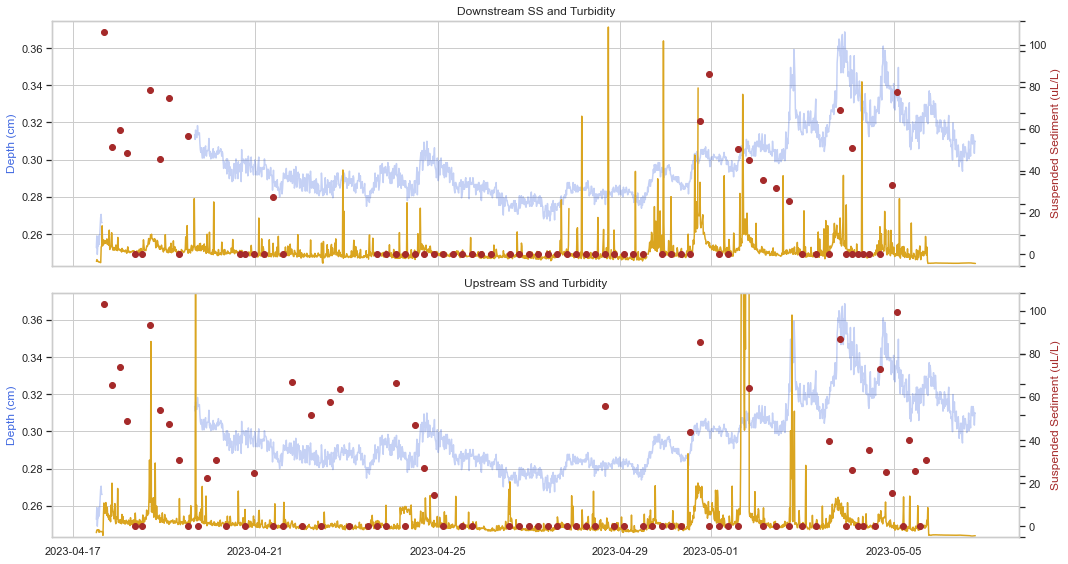

In [4]:
# getting min and max dates from turbidity data
min_date = min(down_sonde.index.min(), up_sonde.index.min())
max_date = max(down_sonde.index.max(), up_sonde.index.max())
# filter depth data
filtered_depths = depths.loc[(depths.index >= min_date) & (depths.index <= max_date)]

#plot depth time series for reach
fig, ax = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
sns.set_theme(style="whitegrid")
colors = ['royalblue', 'goldenrod', 'brown']
labels = ['Depth', 'Turbidity', 'Suspended Sediment']
ylabels = ['Depth (cm)', 'Turbidity (NTU)', 'Suspended Sediment (uL/L)']
data = [(down_sonde, down_constituents), (up_sonde, up_constituents)]
titles = ['Downstream SS and Turbidity', 'Upstream SS and Turbidity']

for i, (sonde, constituents) in enumerate(data):
    axes = [ax[i].twinx() if j > 0 else ax[i] for j in range(3)]
    for j, axis in enumerate(axes):
        if j == 0: # depth
            axis.plot(filtered_depths.index, filtered_depths['P3'], label=labels[j], color=colors[j], alpha=0.3)
            axis.grid(True)
            axis.set_ylabel(ylabels[j], color=colors[j])
        elif j == 1: # sonde
            axis.plot(sonde.index, sonde['Turbidity (NTU) (922381)'], label=labels[j], color=colors[j])
            axis.set_ylim(bottom=0, top=200)  # Set y-axis limits for turbidity
            axis.grid(False)
            axis.set_yticklabels([])
        else: # constituents
            axis.plot(constituents.index, constituents['SS (uL/L)'], 'o', label=labels[j], color=colors[j])
            axis.grid(False)
            axis.set_ylabel(ylabels[j], color=colors[j])
    ax[i].set_title(titles[i])

plt.tight_layout()
plt.show()

Cleanup Turbidity Data

In [6]:
def LVL1toLVL2(Turbidity, ResetValue, TransitionValue, MaxChange, MaxValue):
    """
    This function is based off the R script from Yousif, et.al., 2022
    https://www.sciencedirect.com/science/article/pii/S1364815222001669
    
    """
    # Replace negative values with NA, 0's with 1e-5, and delete anything above the set max value
    Turbidity.loc[Turbidity['DataValue'] < 0, 'DataValue'] = np.nan
    Turbidity.loc[Turbidity['DataValue'] == 0, 'DataValue'] = 1e-5
    Turbidity.loc[Turbidity['DataValue'] > MaxValue, 'DataValue'] = np.nan

    # Setup some parameters used in the while loop
    CurrentChange = pd.DataFrame(np.zeros((len(Turbidity), 1)))
    
    # This will iterate through
    for i in range(5, len(Turbidity)):
        # Check if value is blank and replace with a predicted value
        if pd.isnull(Turbidity.at[i, 'DataValue']):
            placeholder = np.arange(1, 6)
            model = LinearRegression().fit(placeholder.reshape(-1, 1), Turbidity['DataValue'].iloc[i-5:i])
            if (model.coef_[0] + 6*model.intercept_) < 0:
                Turbidity.at[i, 'DataValue'] = Turbidity.at[i-1, 'DataValue']
            else:
                Turbidity.at[i, 'DataValue'] = model.coef_[0] + 6*model.intercept_
            CurrentChange.at[i, 0] = 100*(Turbidity.at[i, 'DataValue'] - Turbidity.at[i-1, 'DataValue']) / Turbidity.at[i-1, 'DataValue']
            # Change QA code to 1 (Estimated Value)
            Turbidity.at[i, 'QualifierID'] = 1
        else:
            # Check the rest of the conditions
            if Turbidity.at[i, 'DataValue'] < ResetValue:
                CurrentChange.at[i, 0] = 100*(Turbidity.at[i, 'DataValue'] - Turbidity.at[i-1, 'DataValue']) / Turbidity.at[i-1, 'DataValue']
                # In case this point returns from bad data, reset the currentchange value to 0
                if abs(CurrentChange.at[i, 0]) > 100:
                    CurrentChange.at[i, 0] = 0
            elif Turbidity.at[i, 'DataValue'] < TransitionValue:
                CurrentChange.at[i, 0] = 100*(Turbidity.at[i, 'DataValue'] - Turbidity.at[i-1, 'DataValue']) / Turbidity.at[i-1, 'DataValue']
                AbsoluteDifference = abs(Turbidity.at[i, 'DataValue'] - Turbidity.at[i-1, 'DataValue'])
                SlopeDifference = abs(CurrentChange.at[i, 0] - CurrentChange.at[i-1, 0])
                if abs(CurrentChange.at[i, 0]) < 50 or AbsoluteDifference < 5 or SlopeDifference < 50:
                    pass
                else:
                    placeholder = np.arange(1, 6)
                    model = LinearRegression().fit(placeholder.reshape(-1, 1), Turbidity['DataValue'].iloc[i-5:i])
                    if model.coef_[0] + 6*model.intercept_ < 0:
                        Turbidity.at[i, 'DataValue'] = Turbidity.at[i-1, 'DataValue']
                        Turbidity.at[i, 'QualifierID'] = 1
                    elif model.coef_[0] + 6*model.intercept_ > Turbidity.at[i, 'DataValue']:
                        pass
                    else:
                        Turbidity.at[i, 'DataValue'] = model.coef_[0] + 6*model.intercept_
                        Turbidity.at[i, 'QualifierID'] = 1
                    CurrentChange.at[i, 0] = 100*(Turbidity.at[i, 'DataValue'] - Turbidity.at[i-1, 'DataValue']) / Turbidity.at[i-1, 'DataValue']
            else:
                CurrentChange.at[i, 0] = 100*(Turbidity.at[i, 'DataValue'] - Turbidity.at[i-1, 'DataValue']) / Turbidity.at[i-1, 'DataValue']
                SlopeDifference = abs(CurrentChange.at[i, 0] - CurrentChange.at[i-1, 0])
                AbsoluteDifference = abs(Turbidity.at[i, 'DataValue'] - Turbidity.at[i-1, 'DataValue'])
                if SlopeDifference < 50 and AbsoluteDifference < MaxChange:
                    pass
                else:
                    placeholder = np.arange(1, 6)
                    model = LinearRegression().fit(placeholder.reshape(-1, 1), Turbidity['DataValue'].iloc[i-5:i])
                    if model.coef_[0] + 6*model.intercept_ < 0:
                        Turbidity.at[i, 'DataValue'] = Turbidity.at[i-1, 'DataValue']
                        Turbidity.at[i, 'QualifierID'] = 1
                    elif model.coef_[0] + 6*model.intercept_ > Turbidity.at[i, 'DataValue']:
                        pass
                    else:
                        Turbidity.at[i, 'DataValue'] = model.coef_[0] + 6*model.intercept_
                        Turbidity.at[i, 'QualifierID'] = 1
                    CurrentChange.at[i, 0] = 100*(Turbidity.at[i, 'DataValue'] - Turbidity.at[i-1, 'DataValue']) / Turbidity.at[i-1, 'DataValue']

    # Remove sections where linear interpolation goes beyond 3 points
    Index = np.zeros(len(Turbidity))
    for i in range(len(Turbidity)):
        if Turbidity.at[i, 'QualifierID'] == 0:
            Index[i] = 0
        else:
            Index[i] = Index[i-1] + 1
    for i in range(len(Turbidity)):
        if Index[i] > 3:
            Turbidity.at[i-Index[i]+1:i+1, 'DataValue'] = np.nan

    # Undo the 0 value change from earlier and replace NA with -9999
    Turbidity.loc[Turbidity['DataValue'] == 1e-5, 'DataValue'] = 0
    Turbidity['DataValue'].fillna(-9999, inplace=True)

    # Print success message
    replaced_values = len(Turbidity[Turbidity['QualifierID'] == 1])
    total_values = len(Turbidity)
    print(f"Run successful, with {replaced_values} ({round(replaced_values/total_values*100, 2)}%) values replaced.")

    # Return the modified Turbidity DataFrame
    return Turbidity